In [51]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

In [52]:
#Importing Data
claimants = pd.read_csv("C:\\Users\\Sagar S S\\Downloads\\claimants(1).csv")


In [53]:
claimants.head(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [54]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
CASENUM     1340 non-null int64
ATTORNEY    1340 non-null int64
CLMSEX      1328 non-null float64
CLMINSUR    1299 non-null float64
SEATBELT    1292 non-null float64
CLMAGE      1151 non-null float64
LOSS        1340 non-null float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [55]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [56]:
claimants.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x187a1fac748>,
 'caps': [<matplotlib.lines.Line2D at 0x187a1fc6e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x187a1fbfb48>],
 'medians': [<matplotlib.lines.Line2D at 0x187a1fc6748>],
 'fliers': [<matplotlib.lines.Line2D at 0x187a1fcc388>],
 'means': []}

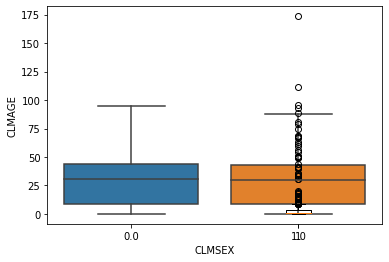

In [57]:
import seaborn as sns
sns.boxplot(x="CLMSEX",y="CLMAGE",data=claimants)
plt.boxplot(claimants.LOSS)

In [58]:
#removing CASENUM
claimants.drop(["CASENUM"],axis=1,inplace=True)
claimants.head(5)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [59]:
#Finding the missing values
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [60]:
# usage lambda and apply function
# apply function => we use to apply custom function operation on each column 
# lambda just an another syntax to apply a function on each value without using for loop

claimants.apply(lambda x:x.mean()) 
claimants.mean()

ATTORNEY     0.488806
CLMSEX       0.558735
CLMINSUR     0.907621
SEATBELT     0.017028
CLMAGE      28.414422
LOSS         3.806307
dtype: float64

In [61]:
#Imputating the missing values with most repeated values in that column  
claimants.ATTORNEY.value_counts()
claimants.ATTORNEY.value_counts().index[0] # gets you the most occuring value

0

In [62]:
# mode value of the 'ATTORNEY' 
claimants.ATTORNEY.mode()[0]

0

In [63]:
claimants.CLMSEX.value_counts()
claimants.CLMSEX.value_counts().index[0] # gets you the most occuring value

1.0

In [64]:
# filling the missing value with most occuring value   
claimants.iloc[:,0:4] = claimants.iloc[:,0:4].apply(lambda x:x.fillna(x.mode()[0]))
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [65]:
claimants.iloc[:,0:4].columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT'], dtype='object')

In [66]:
claimants.CLMAGE = claimants.CLMAGE.fillna(claimants.CLMAGE.mean())

In [67]:
claimants.isnull().sum() # No null values

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Model Building

In [68]:
from scipy import stats
import scipy.stats as st
import statsmodels.formula.api as sm

In [69]:
logit_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = claimants).fit()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


In [70]:
# Summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.1209
Time:                        18:25:10   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [71]:
# Predicting the values using predict function
y_pred = logit_model.predict(claimants)

In [72]:
# Creating new column for storing predicted class of Attorney
claimants["pred_prob"] = y_pred
claimants["Att_val"] = 0

In [73]:
# taking threshold value as 0.5 and above the prob value will be treated as correct value
  
claimants.loc[y_pred>=0.5,"Att_val"] = 1
claimants.Att_val

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: Att_val, Length: 1340, dtype: int64

In [74]:
from sklearn.metrics import classification_report


In [75]:
classification_report(claimants.Att_val,claimants.ATTORNEY)

'              precision    recall  f1-score   support\n\n           0       0.64      0.74      0.69       587\n           1       0.77      0.67      0.72       753\n\n    accuracy                           0.70      1340\n   macro avg       0.70      0.71      0.70      1340\nweighted avg       0.71      0.70      0.70      1340\n'

In [76]:
# confusion matrix 
confusion_matrix = pd.crosstab(claimants['ATTORNEY'],claimants.Att_val)

In [77]:
confusion_matrix

Att_val,0,1
ATTORNEY,,
0,436,249
1,151,504


In [78]:
accuracy = (436+504)/(1340)
accuracy

0.7014925373134329

# ROC Curve

In [79]:
from sklearn import metrics

In [80]:
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(claimants.ATTORNEY, y_pred)

Text(0, 0.5, 'True Positive')

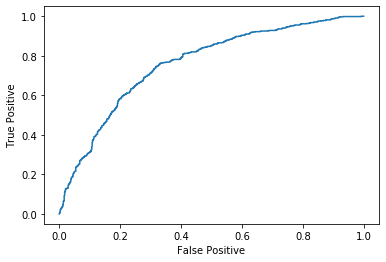

In [81]:

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")

In [82]:
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 

In [83]:
roc_auc

0.7601014097063576

# Dividing data into Train and Test Data set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Removing the 'Att_val' from the DataFrame
claimants.drop("Att_val",axis=1,inplace=True)

In [86]:
# Dividing the data set into train and test using train_test_split function 
train,test = train_test_split(claimants,test_size=0.3)

In [87]:
# Building a model on train data set 

train_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = train).fit()


Optimization terminated successfully.
         Current function value: 0.616405
         Iterations 7


In [88]:
#summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.1104
Time:                        18:25:13   Log-Likelihood:                -578.19
converged:                       True   LL-Null:                       -649.96
Covariance Type:            nonrobust   LLR p-value:                 3.161e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3981      0.266     -1.494      0.135      -0.920       0.124
CLMAGE         0.0078      0.004      2.048      0.041       0.000       0.015
LOSS          -0.2856      0.034     -8.410      0.000      -0.352      -0.219
CLMINSUR       0.6681      0.246      2.712      0.007       0.185       1.151
CLMSEX         0.3457      0.143      2.418      0.016       0.065       0.626
SEATBELT      -0.2748      0.607     -0.453      0.651      -1.465       0.915
==============================================================================
"""

In [89]:
train_pred = train_model.predict(train.iloc[:,1:])

In [90]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
train["train_pred"] = np.zeros(938)

C:\Users\Sagar S S\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [91]:
# taking threshold value as 0.5 and above the prob value will be treated as correct value 

train.loc[train_pred>0.5,"train_pred"] = 1

C:\Users\Sagar S S\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['ATTORNEY'],train.train_pred)


In [93]:
confusion_matrix

train_pred,0.0,1.0
ATTORNEY,,
0,306,173
1,105,354


In [94]:
accuracy_train = (436+504)/(1340) # 70.14
accuracy_train

0.7014925373134329

In [95]:
# Prediction on Test data set
test_pred = train_model.predict(test)


In [96]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
test["test_pred"] = np.zeros(402)

C:\Users\Sagar S S\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [97]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

In [98]:
# confusion matrix 
confusion_matrix = pd.crosstab(test['ATTORNEY'],test.test_pred)

In [99]:
confusion_matrix

test_pred,0.0,1.0
ATTORNEY,,
0,125,81
1,45,151


In [100]:
confusion_matrix
accuracy_test = (126+161)/(402) # 71.39
accuracy_test


0.7139303482587065